In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn import mixture

In [2]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
THERESA_MAY_COLOR = '#b7c631'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
LEOMESSI_COLOR = '#e8d2d0'

CRISTIANO_RONALDO = 'cristiano'
CRISTIANO_RONALDO_COLOR = '#bec6c0'

RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

# sport clubs
REAL_MADRID = 'realmadrid'
FC_BARCELONA = 'fcbarcelona'


LIST_ALL_USERS = [DONALD_TRUMP , BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, FLOTUS, CNN, FOXNEWS, BBC, LEOMESSI, CRISTIANO_RONALDO,RAFAEL_NADAL ]

# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
c0_name_fan = 'C0-Fan-page'
c1_name_ordinary = 'C1-Ordinary-User'
c2_name_botlike = 'C2-Botlike'

In [4]:
df = pd.read_excel('../Similarity/dataset_impersonator_with_all.xlsx')
print(df.shape[0])

3832


In [5]:
df['combined_similarity_photo_like'].fillna("--", inplace=True)
df['combined_similarity_photo_comment'].fillna("--", inplace=True)

In [6]:
def get_first_element_in_like_similarity(_row):

    temp = 0
    
    if (not _row['combined_similarity_photo_like'] == "--"):
        photo_similarities = _row['combined_similarity_photo_like'].split(",,,")
        
        if (photo_similarities[0] == 'True'):
            temp = 1
        else:
            temp = 0
            
    _row['combined_similarity_photo'] = temp
        
    return _row

df = df.apply(get_first_element_in_like_similarity, axis=1)

In [7]:
# df.columns
# df[['owener_id', 'combined_shortcode_username', 'total_comment', 'comment_created_at', 'comment_id',
#        'comment_post_shortcode', 'comment_shortcode_username', 'comment_text']]
df_dataset = df[[
        'combined_similarity_username', 
        'combined_similarity_full_name',
        'combined_similarity_biography',
        'combined_similarity_photo',


    'combined_follower',     
    'combined_followee',
    'combined_mediacount',
    'combined_is_private',
    'combined_is_verified', 

#        'comment_created_at', 'comment_id', 'comment_post_shortcode',
#        'comment_shortcode_username', 'comment_text', 
   
   ]]

df_dataset.columns = ['username', 'name', 'bio', 'photo', 'follower', 'followee', 'mediacount', 'private', 'verified']
df_dataset['class'] = 'impersonator'

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
def calculate_least_common_metrics(_row):

    _row['lcm'] = 0
    
    if (_row['username'] > 0):
        _row['lcm'] =  1
        return _row
    
    if (_row['name'] > 0):
        _row['lcm'] =  1
        return _row
    
    if (_row['bio'] > 0):
        _row['lcm'] =  1
        return _row
    
    if (_row['photo'] > 0):
        _row['lcm'] =  1
        return _row
        
    return _row

df_dataset = df_dataset.apply(calculate_least_common_metrics, axis=1)

In [9]:
def calculate_most_common_metrics(_row):

    _row['mcm'] = 0
    
    if (_row['username'] > 0):
        _row['mcm'] = _row['mcm'] + 1
    
    if (_row['name'] > 0):
        _row['mcm'] = _row['mcm'] + 1
    
    if (_row['bio'] > 0):
        _row['mcm'] = _row['mcm'] + 1
        
    if (_row['photo'] > 0):
        _row['mcm'] = _row['mcm'] + 1
        
    return _row

df_dataset = df_dataset.apply(calculate_most_common_metrics, axis=1)

In [10]:
#boolean to int
df_dataset[['private', 'verified']] = df_dataset[['private', 'verified']].astype(int)

In [11]:
#reorder
df_dataset = df_dataset[['username', 'name', 'bio', 'photo', 'follower', 'followee', 'mediacount', 'private', 'verified', 'lcm', 'mcm', 'class']]
# df_dataset = df_dataset[['follower', 'followee', 'mediacount', 'private', 'verified', 'lcm', 'mcm', 'class']]
df_total = df_dataset

In [12]:
# normalize 
column_names_to_normalize = ['follower']#, 'followee', 'mediacount']
x = df_total[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_total['nfollower'] = x_scaled

column_names_to_normalize = ['followee']#, 'followee', 'mediacount']
x = df_total[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_total['nfollowee'] = x_scaled


column_names_to_normalize = ['mediacount']#, 'followee', 'mediacount']
x = df_total[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_total['nmediacount'] = x_scaled


column_names_to_normalize = ['mcm']#, 'followee', 'mediacount']
x = df_total[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_total['nmcm'] = x_scaled

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
df_final = df_total[['username', 'name', 'bio', 'photo', 'nfollower', 'nfollowee', 'nmediacount', 'follower', 'followee', 'mediacount', 'private', 'verified', 'lcm', 'mcm', 'nmcm', 'class']]
df_final.head()

username  name       bio  photo  nfollower  nfollowee  nmediacount  \
0  0.303216   0.0  0.000000      0   0.000022   0.052744     0.006037   
1  0.000000   0.0  0.379978      0   0.002047   0.181007     0.013694   
2  0.000000   0.0  0.407353      0   0.000332   0.131993     0.015847   
3  0.000000   0.0  0.482680      0   0.000162   0.079382     0.011386   
4  0.000000   0.0  0.303216      0   0.000061   0.055940     0.003862   

   follower  followee  mediacount  private  verified  lcm  mcm  nmcm  \
0       170       396         272        1         0    1    1   0.0   
1     15659      1359         617        0         0    1    1   0.0   
2      2539       991         714        0         0    1    1   0.0   
3      1240       596         513        1         0    1    1   0.0   
4       468       420         174        1         0    1    1   0.0   

          class  
0  impersonator  
1  impersonator  
2  impersonator  
3  impersonator  
4  impersonator

In [14]:
# kmeans
# OK
# df_kmean = df_total[['username', 'name', 'bio', 'photo', 'nfollower', 'nfollowee', 'nmediacount', 'private',  'class']]

# no
# df_kmean = df_total[['username', 'name', 'bio', 'photo', 'nfollower', 'nfollowee', 'nmediacount', 'private',  'verified', 'class']]

# ok
df_kmean = df_total[['nmcm', 'username', 'name', 'bio', 'photo',  'nfollower', 'class']]

#ok
# df_kmean = df_total[['username', 'name', 'bio', 'photo', 'nfollower', 'nfollowee', 'nmediacount', 'private', 'verified', 'lcm', 'mcm', 'class']]

# df_kmean = df_total[['username', 'name', 'bio', 'photo', 'follower', 'followee', 'mediacount', 'private',  'verified', 'class']]

df_kmean.head()

nmcm  username  name       bio  photo  nfollower         class
0   0.0  0.303216   0.0  0.000000      0   0.000022  impersonator
1   0.0  0.000000   0.0  0.379978      0   0.002047  impersonator
2   0.0  0.000000   0.0  0.407353      0   0.000332  impersonator
3   0.0  0.000000   0.0  0.482680      0   0.000162  impersonator
4   0.0  0.000000   0.0  0.303216      0   0.000061  impersonator

In [15]:
# Split-out validation dataset
array = df_kmean.values
X = array[:,0:len(df_kmean.columns)-1]
Y = array[:,len(df_kmean.columns)-1]
validation_size = 0.30
seed = 11
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# PCA 2D

In [16]:
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

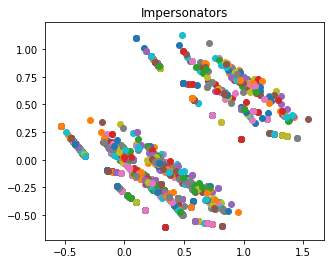

In [17]:
fig, (ax1) = plt.subplots(1,1, figsize=(5,4))

for i in range(0, pca_2d.shape[0]):
    ax1.scatter(pca_2d[i,0],pca_2d[i,1])

ax1.set_title('Impersonators')
# ax1.set_xscale('log')
# ax1.set_yscale('log')
plt.show()

In [18]:
df_pca_2d = pd.DataFrame({'1':pca_2d[:,0],'2':pca_2d[:,1]})

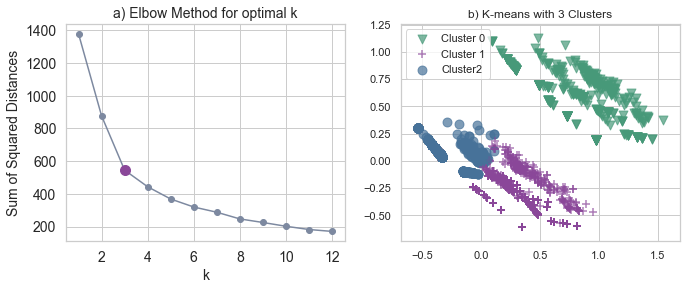

In [23]:
def plot_1():

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4), sharey=False)
    sns.set(style="whitegrid")

    Sum_of_squared_distances = []
    K = range(1,13)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(X)
        Sum_of_squared_distances.append(km.inertia_)

    ax1.plot(K, Sum_of_squared_distances, '-o', c='#7d89a0')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Sum of Squared Distances')
    ax1.set_title('a) Elbow Method for optimal k')

    ax1.plot(3, Sum_of_squared_distances[2], c='#8a4799', alpha=1, ms=10,  marker='o')


    for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
                 ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(14)



    num=3
    kmeans = KMeans(n_clusters=num,  random_state=100)
    kmeans.fit(X)
    labels = kmeans.labels_

    for i in range(0, pca_2d.shape[0]):
        if labels[i] == 0:
            c12 = ax2.scatter(pca_2d[i,0],pca_2d[i,1],c='#8a4799',marker='+',  alpha=0.7, s=80)
        elif labels[i] == 1:
            c22 = ax2.scatter(pca_2d[i,0],pca_2d[i,1],c='#477299',marker='o',  alpha=0.7, s=80)
        elif labels[i] == 2:
            c32 = ax2.scatter(pca_2d[i,0],pca_2d[i,1],c='#479979',marker='v', alpha=0.7, s=80)

    ax2.legend([c32, c12, c22, ], ["Cluster 0", "Cluster 1", "Cluster2"])
    ax2.set_title('b) K-means with 3 Clusters')


    plt.savefig("plot_MLearning8_P1.pdf")
    plt.show()
    
plot_1()

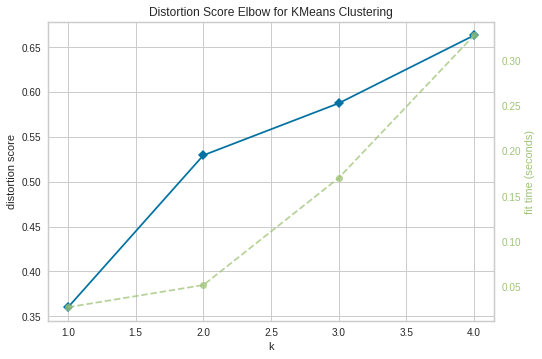

In [19]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,5))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

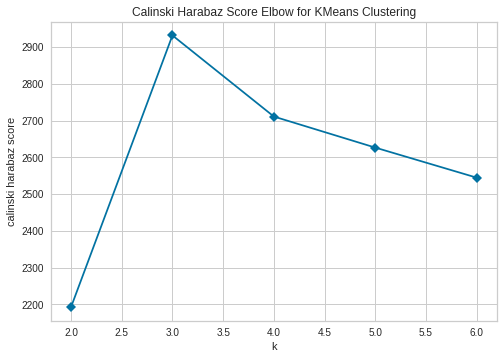

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,7), metric='calinski_harabaz', timings=False
)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [62]:
for k in range (2, 8):
 
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)


k: 2  cost: 877.4015657111421
k: 3  cost: 545.0279834206812
k: 4  cost: 441.5476111842562
k: 5  cost: 365.662203159911
k: 6  cost: 319.4409753203885
k: 7  cost: 275.38321298867885
